# MOLECULE MANIPULATION EXAMPLES

In [1]:
from mlchem.chem.manipulation import (create_molecule,
                                      smiles_to_inchi,
                                      kekulise_smiles,
                                      unkekulise_smiles,
                                      generate_resonance,
                                      mol_to_binary,
                                      PatternRecognition as PR,
                                      PropManager as PM,
                                      remove_smarts_pattern,
                                      )
from mlchem.helper import show_png
from mlchem.chem.visualise.drawing import MolDrawer
from rdkit import Chem
import numpy as np

## Create and display molecule objects

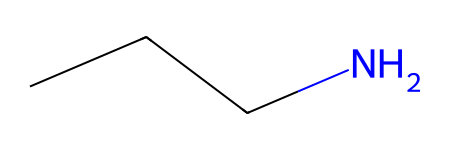

In [4]:
smiles = 'CCCN'
inchi = smiles_to_inchi(smiles)
create_molecule(smiles)

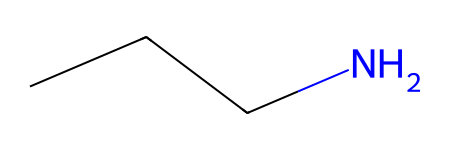

In [5]:
create_molecule(inchi)

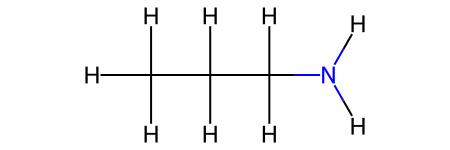

In [6]:
create_molecule(mol_input=smiles,
                add_hydrogens=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

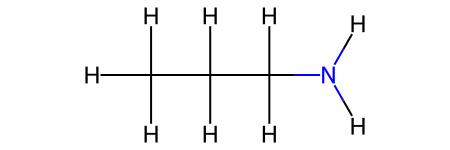

In [7]:
create_molecule(mol_input=smiles,
                add_hydrogens=True,
                solid_sticks=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

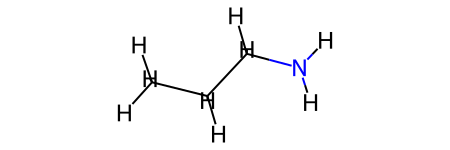

In [9]:
create_molecule(mol_input=smiles,
                add_hydrogens=True,
                solid_sticks=True,
                is_3d=True)

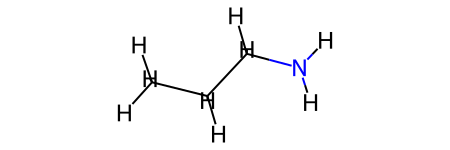

In [10]:
create_molecule(mol_input=smiles,
                add_hydrogens=True,
                solid_sticks=False,
                is_3d=True)

In [29]:
# show=True enables sising

create_molecule(mol_input=smiles,
                
                add_hydrogens=True,
                solid_sticks=True,
                is_3d=True,
                show=True,
                sise=(100,100))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

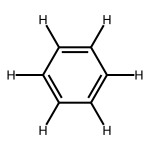

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [37]:
# show=True also enables displaying during iterations

smiles_list = ['CCCN','c1ccccc1','COCOCO']
toggle_3d = [True,False,True]
for s,t in zip(smiles_list,toggle_3d):
    create_molecule(s,
                    add_hydrogens=True,
                    is_3d=t,
                    solid_sticks=t,
                    show=True,
                    sise=(150,150))
    

    200,4,1,1

## Manipulate smiles and molecules

#### kekule forms and resonance

In [2]:
kekulise_smiles('c1ccccc1')

'C1=CC=CC=C1'

In [3]:
unkekulise_smiles('C1=CC=CC=C1')

'c1ccccc1'

c1ccccc1

C1=CC=CC=C1

C1=CC=CC=C1



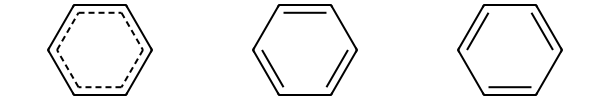

In [4]:
images = generate_resonance('c1ccccc1',save=False)    # set save=True and specify path to save resonance structure images locally
converted_imgs = [show_png(img) for img in images]
drawer = MolDrawer()
drawer.show_images_grid(converted_imgs,
                        n_columns=len(converted_imgs),
                        size=(200,100))


b'\xef\xbe\xad\xde\x00\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x06\x00\x00\x00\x80\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x0b\x00\x01h\x0c\x01\x02h\x0c\x02\x03h\x0c\x03\x04h\x0c\x04\x05h\x0c\x05\x00h\x0cB\x01\x00\x00\x00\x06\x00\x05\x04\x03\x02\x01\x17\x04\x00\x00\x00\x00\x00\x00\x00\x16'

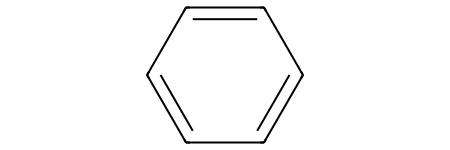

In [5]:
mol = create_molecule('c1ccccc1')
mol_binary = mol_to_binary(mol) # binarise molecule
display(mol_binary)
mol_reconverted = Chem.Mol(mol_binary) # re-convert it into its explicit form
display(mol_reconverted)

### Pattern Recognition

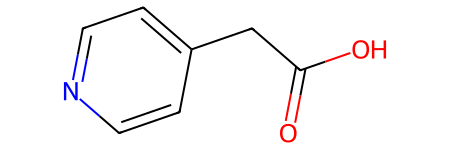

In [6]:
smiles = 'c1cnccc1CC(=O)O'
mol = create_molecule(smiles)
mol

#### basic usage

(True, (6, 7, 9))


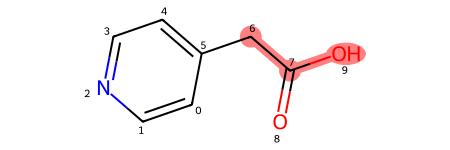

In [7]:
# the SMILES pattern 'CCO' is represented by atoms 6,7 and 9.

result = PR.Base.check_smiles_pattern(target=mol,smiles_pattern='CCO')
print(result)
PM.Base.assign_atom_notes(mol)
mol

(True, array([0, 1, 2, 3, 4, 5]), '[R]')


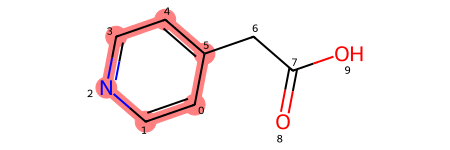

In [2]:
from mlchem.chem.manipulation import (PatternRecognition as PR,
                                      PropManager as PM,
                                      create_molecule)



smiles = 'c1cnccc1CC(=O)O'        # create SMILES string
mol = create_molecule(smiles)     # create mol object


# check ring pattern
# the ring SMARTS pattern is represented by atoms 0,1,2,3,4,5
result = PR.Base.check_smarts_pattern(target=mol,smarts_pattern='[R]')
print(result)                    
# display atom notes
PM.Base.assign_atom_notes(mol)
display(mol)

(True, array([5, 6]), '[R]-[C]')


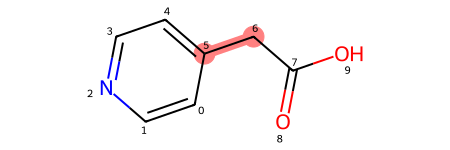

In [9]:
# an acyclic carbon next to a ring: the SMARTS pattern is represented by atoms 5,6

result = PR.Base.check_smarts_pattern(target=mol,smarts_pattern='[R]-[C]')
print(result)
PM.Base.assign_atom_notes(mol)
mol

(True, array([5, 6, 7, 8, 9]), '[#8]~A~A~* |$;;;CHC$|')


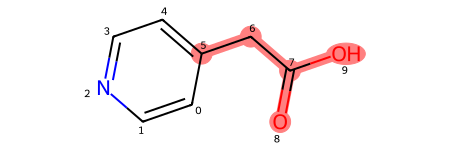

In [10]:
# An oxygen atom at a distance of 3 non-aromatic atoms from a heterocycle: the SMARTS pattern is represented by atoms 5, 6, 7, 8, 9

# Using rdkit generic keyword for heterocycle in this example.
# A full list of generic keywords is in the PatternRecognition class documentation.

result = PR.Base.check_smarts_pattern(target=mol,smarts_pattern='[#8]~A~A~*',generic_keywords=['CHC'])
print(result)
PM.Base.assign_atom_notes(mol)
mol

(True, 'c1:c:c:c:c:c:1-CCO', (0, 1, 2, 3, 4, 5, 6, 7, 9), (8, 9, 10, 11, 12, 7, 6, 5, 4), 0.5294117647058824)
Similarity: 0.529


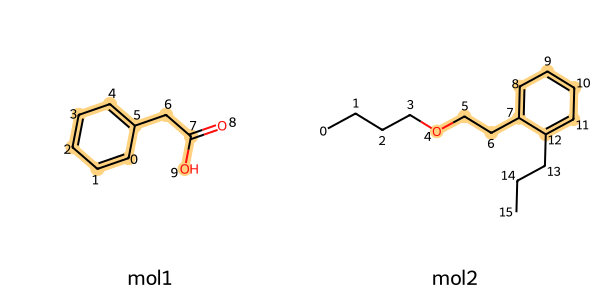

In [208]:
# maximum common substructure

drawer = MolDrawer()
drawer.update_drawing_options(annotationFontScale=1,
                              highlightColour='orange',
                              highlightAlpha=0.5,
                              legendFontSise=20,
                              fixedBondLength=22,
                              annotationColour='black')
mol2 = create_molecule('CCCCOCCc1ccccc1CCC')

PM.Base.clear_all_atomprops(mol)
PM.Base.assign_atom_notes(mol)
PM.Base.assign_atom_notes(mol2)

result = PR.Base.get_MCS(input1=mol,input2=mol2)
print(result)
PR.Base.check_smarts_pattern(target=mol,smarts_pattern=result[1])
PR.Base.check_smarts_pattern(target=mol2,smarts_pattern=result[1])
img1 = drawer.draw_mol(mol,highlightAtoms=result[2],legend='mol1')
img2 = drawer.draw_mol(mol2,highlightAtoms=result[3],legend='mol2')
print(f"Similarity: {result[-1]:.3f}")
drawer.show_images_grid([img1,img2],n_columns=2)

#### inspect certain properties

In [ ]:
atoms = PR.Base.get_atoms(mol)
bonds = PR.Base.get_bonds(mol)
print(bool(PR.Atoms.is_SP3(atoms[6]))) # aliphatic
print(PR.Atoms.get_ring_size(atoms[6])) # does not belong to rings

print(bool(PR.Atoms.is_SP3(atoms[0]))) # belongs to aromatic ring
print(PR.Atoms.get_ring_size(atoms[0])) # belongs to a 6-membered ring


PR.Bonds.check_rotatable_bonds(create_molecule('CC',add_hydrogens=True))

True
0
False
6


(True, (0, 1), '[!$(*#*)&!D1]-!@[!$(*#*)&!D1]')

#### remove 3 terminal carbons from mol2

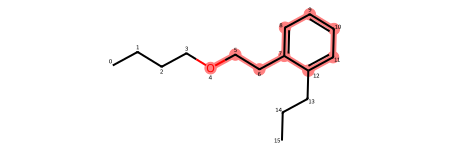

In [210]:
mol2

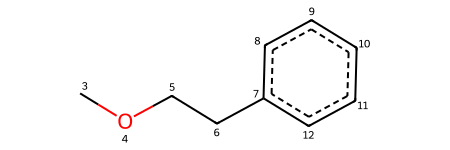

In [211]:
mol3 = remove_smarts_pattern(mol2,smarts_string='[CD1][CD2][CD2]')
mol3

## **Conformational analysis of butane**

The conformational analysis of butane involves examining the different spatial arrangements of its atoms as the molecule rotates around its central C2-C3 bond.

1. **Anti Conformation**:
   - **Description**: The two methyl groups (CH₃) are positioned 180° apart.
   - **Energy**: This is the lowest energy conformation because it minimises steric hindrance between the bulky methyl groups.
   - **Energy Value**: Approximately 0 kcal/mol.

2. **Gauche Conformation**:
   - **Description**: The two methyl groups are 60° apart.
   - **Energy**: This conformation is higher in energy than the anti conformation due to steric hindrance between the methyl groups.
   - **Energy Value**: Approximately 0.9 kcal/mol higher than the anti conformation.

3. **Eclipsed Conformation**:
   - **Description**: The hydrogen atoms on adjacent carbons are aligned with each other.
   - **Energy**: This conformation is higher in energy due to torsional strain from the eclipsing hydrogen atoms.
   - **Energy Value**: Approximately 3.6 kcal/mol higher than the anti conformation.

4. **Fully Eclipsed Conformation**:
   - **Description**: The two methyl groups are directly aligned with each other.
   - **Energy**: This is the highest energy conformation due to significant steric hindrance and torsional strain.
   - **Energy Value**: Approximately 5.0 kcal/mol higher than the anti conformation.

The energy differences between these conformations arise from a combination of steric hindrance (the repulsion between electron clouds of the methyl groups) and torsional strain (the repulsion between bonding electrons in eclipsed conformations)

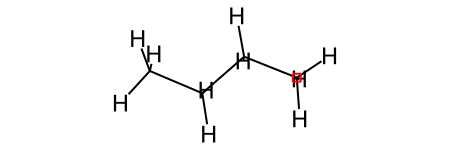

In [285]:
# create a non-optimised butane molecule

mol = create_molecule('CCCC',is_3d=True,solid_sticks=False,show=False,size=(0,0),add_hydrogens=True,optimise=False)
mol

In [292]:
# generate 1000 random conformers of butane

conformers,initial_energies,final_energies = PM.Conformation.generate_conformers(mol,1000,optimise=True,rms_threshold=0,max_iter=1000,force_field='MMFF94')

In [295]:
final_energies = np.array(final_energies)[:,1]
initial_energies = np.array(initial_energies)

In [296]:
final_energies.std()

0.38985098995150586

In [297]:
max(initial_energies) # most unstable conformation

14.185104761008322

In [298]:
final_energies.min() # most stable conformation

-5.075973341403276

In [299]:
final_energies = final_energies + abs(final_energies.min())
initial_energies = initial_energies + abs(initial_energies.min())

### Considerations for Non-Optimised vs. Optimised Conformations

1. **Non-Optimised Conformations**:
   - **Distribution**: The energy distribution of non-optimised conformations is likely to be broad and continuous, reflecting a wide range of possible conformations with varying degrees of steric hindrance and torsional strain.
   - **Energy Levels**: Non-optimised conformations can have higher energy levels due to less favorable spatial arrangements of atoms.

2. **Optimised Conformations**:
   - **Distribution**: The energy distribution of optimised conformations shows a bimodal profile with two distinct peaks.
   - **Energy Levels**: The optimised conformations are more likely to be in lower energy states, corresponding to more stable conformations.

### Explanation for the Bimodal Profile of Optimised Energies

The bimodal distribution of the optimised energies indicates the presence of two predominant energy states for the butane conformations. These states correspond to the two main conformations of butane:

1. **Anti Conformation**:
   - **Description**: The two methyl groups (CH₃) are positioned 180° apart.
   - **Energy**: This is the lowest energy conformation due to minimised steric hindrance between the methyl groups.
   - **Energy Value**: Approximately 0 kcal/mol (relative to the most stable conformation).

2. **Gauche Conformation**:
   - **Description**: The two methyl groups are positioned 60° apart.
   - **Energy**: This conformation is higher in energy than the anti conformation due to steric hindrance between the methyl groups.
   - **Energy Value**: Approximately 0.9 kcal/mol higher than the anti conformation.

### Bimodal Distribution

- **Lower Energy Peak**: The lower energy peak (around 0 kcal/mol) corresponds to the anti conformation, where the methyl groups are positioned opposite to each other, minimising steric hindrance.
- **Higher Energy Peak**: The higher energy peak (around 0.782 kcal/mol) corresponds to the gauche conformation, where the methyl groups are positioned at a dihedral angle of approximately ±60°, resulting in some steric hindrance.

The bimodal distribution reflects the relative stability and population of these conformations in the optimised state. The presence of two distinct peaks indicates that the molecule predominantly adopts these two conformations, with the anti conformation being more stable and the gauche conformation being less stable but still significantly populated.

[(3.567, 3), (3.977, 3), (5.06, 2), (3.382, 2), (5.631, 2)]
[(0.782, 540), (0.0, 460)]


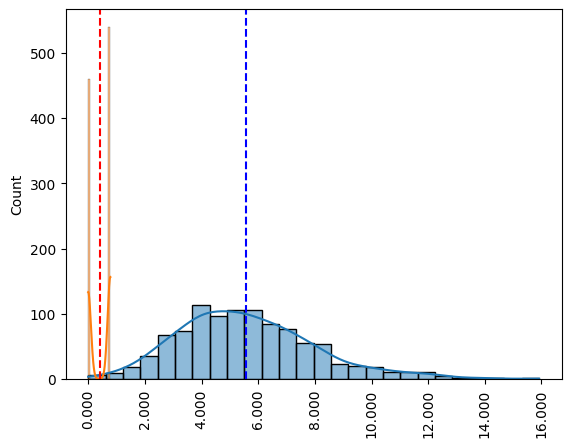

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from collections import Counter

initial_energies = np.round(initial_energies,3)
final_energies = np.round(final_energies,3)


counter_initial = Counter(initial_energies)
counter_final = Counter(final_energies)

print(counter_initial.most_common(5))
print(counter_final.most_common(5))
sns.histplot(initial_energies,kde=True)
sns.histplot(final_energies,kde=True)

plt.axvline(x=np.mean(initial_energies),linestyle='--',color='blue')
plt.axvline(x=final_energies.mean(),linestyle='--',color='red')
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(rotation=90)
plt.show()

### inspect the two optimised conformations

In [272]:
# anti conformation

PM.Conformation.display_conformers(np.array(conformers)[final_energies<1.8][0])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [273]:
# gauche conformation

PM.Conformation.display_conformers(np.array(conformers)[final_energies>1.8][0])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [260]:
from mlchem.chem.calculator.tools import boltzmann_probability

<Axes: ylabel='Count'>

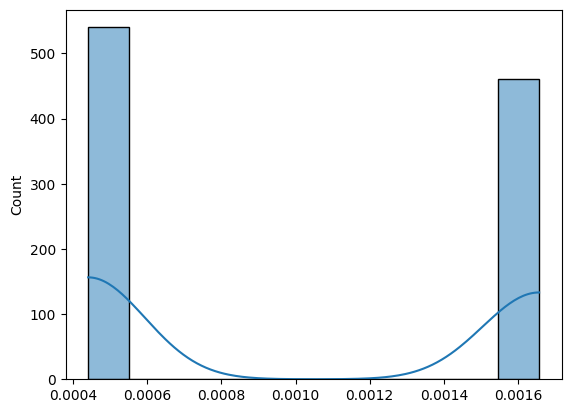

In [301]:
sns.histplot(boltzmann_probability(final_energies,297),kde=True)

In [311]:
def count_occurrences(values):
    occurrence_dict = {}
    for value in values:
        if value in occurrence_dict:
            occurrence_dict[value] += 1
        else:
            occurrence_dict[value] = 1
    return occurrence_dict

count_occurrences(boltzmann_probability(final_energies,temperature=293))

{0.0016639928474223573: 460, 0.0004343764633068807: 540}

 Butane will have anti conformation ~ 76% of the time

In [314]:
probability_1 = 0.0016639928474223573 * 460
probability_2 = 0.0004343764633068807 * 540
print(probability_1,probability_2)

0.7654367098142844 0.2345632901857156
